# COVID-19 Time series Data Analysis

In [312]:
import pandas as pd
import numpy as np   
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = True

In [313]:
covid_data=pd.read_csv('COVID-19 Cases.csv',parse_dates = ['Date'],index_col=['Date']).sort_index(axis=0)

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [314]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 633240 entries, 2020-01-22 to 2020-04-20
Data columns (total 17 columns):
Case_Type                               633240 non-null object
Cases                                   633240 non-null int64
Difference                              633240 non-null int64
Combined_Key                            633240 non-null object
Country_Region                          633240 non-null object
Province_State                          600840 non-null object
Admin2                                  585720 non-null object
iso2                                    632880 non-null object
iso3                                    633060 non-null object
FIPS                                    566460 non-null float64
Lat                                     614340 non-null float64
Long                                    614340 non-null float64
Population_Count                        614340 non-null float64
People_Total_Tested_Count               1008 non-nul

In [315]:
covid_data.head(5)

Case_Type  Cases  Difference                Combined_Key  \
Date                                                                   
2020-01-22  Confirmed      0           0        Bullock, Alabama, US   
2020-01-22  Confirmed      0           0  Walworth, South Dakota, US   
2020-01-22     Deaths      0           0          Owen, Kentucky, US   
2020-01-22  Confirmed      0           0    Webster, Mississippi, US   
2020-01-22     Deaths      0           0      Onondaga, New York, US   

           Country_Region Province_State    Admin2 iso2 iso3     FIPS  \
Date                                                                    
2020-01-22             US        Alabama   Bullock   US  USA   1011.0   
2020-01-22             US   South Dakota  Walworth   US  USA  46129.0   
2020-01-22             US       Kentucky      Owen   US  USA  21187.0   
2020-01-22             US    Mississippi   Webster   US  USA  28155.0   
2020-01-22             US       New York  Onondaga   US  USA  36067.0   

                  Lat        Long  Population_Count  \
Date                                                  
2020-01-22  32.100305  -85.712655           10101.0   
2020-01-22  45.430196 -100.030751            5435.0   
2020-01-22  38.516791  -84.824046           10901.0   
2020-01-22  33.613005  -89.283929            9689.0   
2020-01-22  43.004919  -76.199712          460528.0   

            People_Total_Tested_Count  People_Hospitalized_Cumulative_Count  \
Date                                                                          
2020-01-22                        NaN                                   NaN   
2020-01-22                        NaN                                   NaN   
2020-01-22                        NaN                                   NaN   
2020-01-22                        NaN                                   NaN   
2020-01-22                        NaN                                   NaN   

                                                  Data_Source  \
Date                                                            
2020-01-22  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...   
2020-01-22  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...   
2020-01-22  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...   
2020-01-22  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...   
2020-01-22  2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...   

               Prep_Flow_Runtime  
Date                              
2020-01-22  4/20/2020 8:12:12 PM  
2020-01-22  4/20/2020 8:12:12 PM  
2020-01-22  4/20/2020 8:12:12 PM  
2020-01-22  4/20/2020 8:12:12 PM  
2020-01-22  4/20/2020 8:12:12 PM

In [316]:
covid_data.corr()

Cases  Difference      FIPS  \
Cases                                 1.000000    0.736335 -0.000306   
Difference                            0.736335    1.000000 -0.001067   
FIPS                                 -0.000306   -0.001067  1.000000   
Lat                                   0.006848    0.009567  0.074996   
Long                                  0.082014    0.072992  0.087786   
Population_Count                      0.066153    0.076076 -0.052951   
People_Total_Tested_Count             0.093440   -0.016317  0.266792   
People_Hospitalized_Cumulative_Count  0.097137   -0.006946 -0.202288   

                                           Lat      Long  Population_Count  \
Cases                                 0.006848  0.082014          0.066153   
Difference                            0.009567  0.072992          0.076076   
FIPS                                  0.074996  0.087786         -0.052951   
Lat                                   1.000000 -0.462258         -0.131254   
Long                                 -0.462258  1.000000          0.296637   
Population_Count                     -0.131254  0.296637          1.000000   
People_Total_Tested_Count             0.370647 -0.199772          0.985271   
People_Hospitalized_Cumulative_Count  0.133323  0.524459         -0.209961   

                                      People_Total_Tested_Count  \
Cases                                                  0.093440   
Difference                                            -0.016317   
FIPS                                                   0.266792   
Lat                                                    0.370647   
Long                                                  -0.199772   
Population_Count                                       0.985271   
People_Total_Tested_Count                              1.000000   
People_Hospitalized_Cumulative_Count                   0.861366   

                                      People_Hospitalized_Cumulative_Count  
Cases                                                             0.097137  
Difference                                                       -0.006946  
FIPS                                                             -0.202288  
Lat                                                               0.133323  
Long                                                              0.524459  
Population_Count                                                 -0.209961  
People_Total_Tested_Count                                         0.861366  
People_Hospitalized_Cumulative_Count                              1.000000

In [317]:
covid_data.shape

(633240, 17)

In [318]:
covid_data[(covid_data['Country_Region']=='US')&(covid_data['Admin2']=='Bullock')&(covid_data['Case_Type']=='Confirmed')].corr()

Cases    Difference  FIPS  \
Cases                                 1.000000e+00  5.261524e-01   NaN   
Difference                            5.261524e-01  1.000000e+00   NaN   
FIPS                                           NaN           NaN   NaN   
Lat                                   5.643986e-16  1.810660e-16   NaN   
Long                                 -8.418506e-16 -1.448528e-16   NaN   
Population_Count                               NaN           NaN   NaN   
People_Total_Tested_Count                      NaN           NaN   NaN   
People_Hospitalized_Cumulative_Count           NaN           NaN   NaN   

                                               Lat          Long  \
Cases                                 5.643986e-16 -8.418506e-16   
Difference                            1.810660e-16 -1.448528e-16   
FIPS                                           NaN           NaN   
Lat                                   1.000000e+00 -1.000000e+00   
Long                                 -1.000000e+00  1.000000e+00   
Population_Count                               NaN           NaN   
People_Total_Tested_Count                      NaN           NaN   
People_Hospitalized_Cumulative_Count           NaN           NaN   

                                      Population_Count  \
Cases                                              NaN   
Difference                                         NaN   
FIPS                                               NaN   
Lat                                                NaN   
Long                                               NaN   
Population_Count                                   NaN   
People_Total_Tested_Count                          NaN   
People_Hospitalized_Cumulative_Count               NaN   

                                      People_Total_Tested_Count  \
Cases                                                       NaN   
Difference                                                  NaN   
FIPS                                                        NaN   
Lat                                                         NaN   
Long                                                        NaN   
Population_Count                                            NaN   
People_Total_Tested_Count                                   NaN   
People_Hospitalized_Cumulative_Count                        NaN   

                                      People_Hospitalized_Cumulative_Count  
Cases                                                                  NaN  
Difference                                                             NaN  
FIPS                                                                   NaN  
Lat                                                                    NaN  
Long                                                                   NaN  
Population_Count                                                       NaN  
People_Total_Tested_Count                                              NaN  
People_Hospitalized_Cumulative_Count                                   NaN

In [319]:
covid_data[(covid_data['Country_Region']=='US')&(covid_data['Case_Type']=='Confirmed')].corr()

Cases  Difference      FIPS  \
Cases                                 1.000000    0.860513 -0.000463   
Difference                            0.860513    1.000000 -0.001571   
FIPS                                 -0.000463   -0.001571  1.000000   
Lat                                   0.005972    0.006883  0.074996   
Long                                  0.028554    0.035280  0.087786   
Population_Count                      0.281543    0.325575 -0.052951   
People_Total_Tested_Count             0.047849   -0.017243  0.266792   
People_Hospitalized_Cumulative_Count  0.025963   -0.008472 -0.202288   

                                           Lat      Long  Population_Count  \
Cases                                 0.005972  0.028554          0.281543   
Difference                            0.006883  0.035280          0.325575   
FIPS                                  0.074996  0.087786         -0.052951   
Lat                                   1.000000 -0.290030         -0.061303   
Long                                 -0.290030  1.000000          0.010166   
Population_Count                     -0.061303  0.010166          1.000000   
People_Total_Tested_Count             0.370647 -0.199772          0.985271   
People_Hospitalized_Cumulative_Count  0.133323  0.524459         -0.209961   

                                      People_Total_Tested_Count  \
Cases                                                  0.047849   
Difference                                            -0.017243   
FIPS                                                   0.266792   
Lat                                                    0.370647   
Long                                                  -0.199772   
Population_Count                                       0.985271   
People_Total_Tested_Count                              1.000000   
People_Hospitalized_Cumulative_Count                   0.861366   

                                      People_Hospitalized_Cumulative_Count  
Cases                                                             0.025963  
Difference                                                       -0.008472  
FIPS                                                             -0.202288  
Lat                                                               0.133323  
Long                                                              0.524459  
Population_Count                                                 -0.209961  
People_Total_Tested_Count                                         0.861366  
People_Hospitalized_Cumulative_Count                              1.000000

In [320]:
covid_data[(covid_data['Country_Region']=='US')&(covid_data['Case_Type']=='Confirmed')].describe()

Cases     Difference           FIPS            Lat  \
count  293310.000000  293310.000000  283230.000000  283950.000000   
mean       38.058007       2.673533   30335.484906      38.414583   
std       932.890670      54.898376   15196.115165       5.437648   
min         0.000000   -1314.000000      60.000000     -14.271000   
25%         0.000000       0.000000   18169.000000      34.688358   
50%         0.000000       0.000000   29171.000000      38.384828   
75%         1.000000       0.000000   45079.000000      41.792284   
max    141235.000000    8220.000000   56045.000000      69.314792   

                Long  Population_Count  People_Total_Tested_Count  \
count  283950.000000      2.839500e+05                 504.000000   
mean      -92.155938      1.076612e+05               60650.003968   
std        14.271230      3.661183e+05               85624.473857   
min      -170.132000      8.600000e+01                   3.000000   
25%       -98.313190      1.093900e+04               13350.000000   
50%       -90.404212      2.603200e+04               34905.500000   
75%       -83.430787      6.906900e+04               67903.000000   
max       145.673900      1.003911e+07              633861.000000   

       People_Hospitalized_Cumulative_Count  
count                            504.000000  
mean                            1900.807540  
std                             6668.908734  
min                                0.000000  
25%                               55.000000  
50%                              395.500000  
75%                             1494.750000  
max                            57103.000000

In [321]:
df_groupby=covid_data[(covid_data['Case_Type']=='Confirmed')&(covid_data['Country_Region']=='US')].groupby(['Date','Country_Region'])[['Population_Count','Difference']].sum()

In [322]:
df_groupby

Population_Count  Difference
Date       Country_Region                              
2020-01-22 US                   339671000.0           1
2020-01-23 US                   339671000.0           0
2020-01-24 US                   339671000.0           1
2020-01-25 US                   339671000.0           0
2020-01-26 US                   339671000.0           3
...                                     ...         ...
2020-04-16 US                   339671000.0       31242
2020-04-17 US                   339671000.0       32114
2020-04-18 US                   339671000.0       32491
2020-04-19 US                   339671000.0       26889
2020-04-20 US                   339671000.0       25240

[90 rows x 2 columns]

In [323]:
df_groupby_US=covid_data[(covid_data['Case_Type']=='Confirmed')&(covid_data['Country_Region']=='US')].groupby(['Date'])[['Difference']].sum()

In [324]:
df_groupby_US

Difference
Date                  
2020-01-22           1
2020-01-23           0
2020-01-24           1
2020-01-25           0
2020-01-26           3
...                ...
2020-04-16       31242
2020-04-17       32114
2020-04-18       32491
2020-04-19       26889
2020-04-20       25240

[90 rows x 1 columns]

In [325]:
df_groupby_US.plot()

In [326]:
result = seasonal_decompose(df_groupby_US['Difference'],model ='additive')

In [327]:
result.plot()

In [328]:
result_2 = seasonal_decompose(df_groupby_US['Difference'],model ='additive',extrapolate_trend='freq')

In [329]:
result_2.plot()

In [330]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [331]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])
moving_average(df_groupby_US, 30)

25284.033333333333

In [332]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [333]:
plotMovingAverage(df_groupby_US, 7, plot_intervals=True) 

In [334]:
df_groupby_US_anomaly = df_groupby_US.copy()
df_groupby_US_anomaly.iloc[-20] = df_groupby_US_anomaly.iloc[-20] * 0.2 # say we have 80% drop of ads 

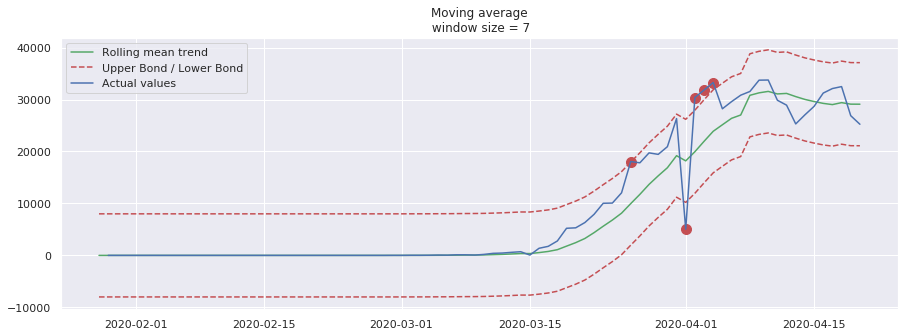

In [335]:
plotMovingAverage(df_groupby_US_anomaly, 7, plot_intervals=True, plot_anomalies=True)

In [336]:
def weighted_average(series, weights):
    """
        Calculate weighter average on series
    """
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [337]:
weighted_average(df_groupby_US, [0.6, 0.3, 0.1])

30085.3

In [338]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [339]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

In [340]:
plotExponentialSmoothing(df_groupby_US.Difference, [0.85, 0.05])

In [341]:
len(df_groupby_US)

90

In [342]:
np.random.seed(7)

In [343]:
dataset = df_groupby_US.values

In [344]:
dataset = dataset.astype('float64')

In [345]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [346]:
# split into train and test sets
train_size = int(len(dataset) * 0.60)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

54 36


In [347]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [348]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [349]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [350]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 2.5551e-05
Epoch 2/100
 - 1s - loss: 2.6425e-05
Epoch 3/100
 - 1s - loss: 2.3962e-05
Epoch 4/100
 - 0s - loss: 2.3802e-05
Epoch 5/100
 - 0s - loss: 2.2707e-05
Epoch 6/100
 - 0s - loss: 2.3958e-05
Epoch 7/100
 - 0s - loss: 2.6546e-05
Epoch 8/100
 - 0s - loss: 2.2253e-05
Epoch 9/100
 - 0s - loss: 2.1811e-05
Epoch 10/100
 - 0s - loss: 2.2219e-05
Epoch 11/100
 - 0s - loss: 2.3108e-05
Epoch 12/100
 - 0s - loss: 2.5326e-05
Epoch 13/100
 - 0s - loss: 2.2068e-05
Epoch 14/100
 - 0s - loss: 2.2557e-05
Epoch 15/100
 - 0s - loss: 1.9613e-05
Epoch 16/100
 - 0s - loss: 2.1221e-05
Epoch 17/100
 - 0s - loss: 2.5898e-05
Epoch 18/100
 - 0s - loss: 2.4271e-05
Epoch 19/100
 - 1s - loss: 2.2552e-05
Epoch 20/100
 - 0s - loss: 1.9130e-05
Epoch 21/100
 - 0s - loss: 2.1621e-05
Epoch 22/100
 - 0s - loss: 1.9678e-05
Epoch 23/100
 - 0s - loss: 2.1362e-05
Epoch 24/100
 - 0s - loss: 2.0601e-05
Epoch 25/100
 - 0s - loss: 1.8714e-05
Epoch 26/100
 - 0s - loss: 1.8423e-05
Epoch 27/100
 - 0s - 

In [351]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 33.00 RMSE
Test Score: 6055.69 RMSE


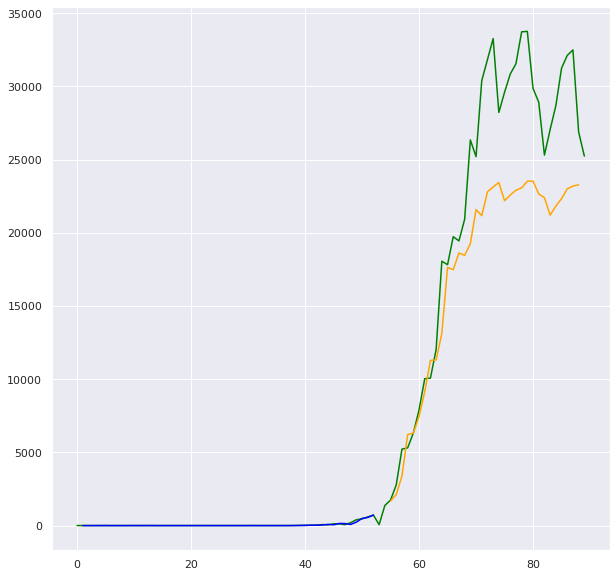

In [352]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),color='green',label='inverse transform')
plt.plot(trainPredictPlot,color='blue',label='train Predict Plot')
plt.plot(testPredictPlot,color='orange',label='test Predict Plot')
plt.show()